### Import

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from PIL import Image
from scipy.stats import multivariate_normal as mnorm

### Discrete Cosine Tranform

In [3]:
def dct2(a):
    return fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

### Inverse Discrete Cosine Transform

In [4]:
def idct2(a):
    return fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

### Load Image

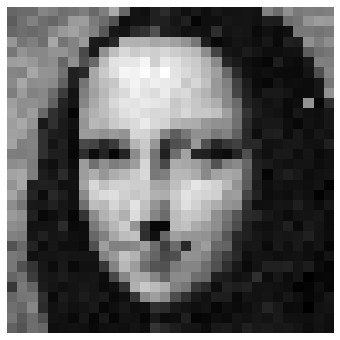

In [5]:
im = np.array(Image.open("../../data/dct/mona_lisa_32x32x3.bmp"))
im = np.mean(im,axis=2)
plt.figure(figsize=(6,6))
plt.imshow(im,cmap='gray',interpolation='nearest')
plt.axis('off');

### Graphical Representation of method DCT with cosines

0.703125


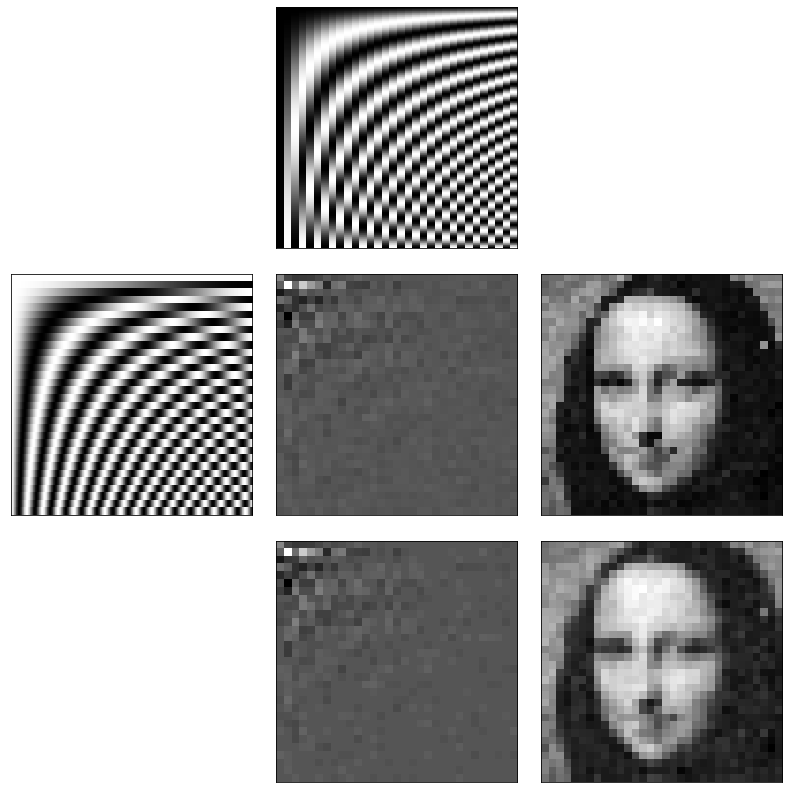

In [41]:
cx = np.zeros((360,32))
val = np.linspace(0,np.pi,361)[:-1]
for i in range(32):
    cx[:,i] = np.cos(val*(i))
im_dct = dct2(im)
im_dct_filtered = im_dct.copy()
im_dct_filtered[np.abs(im_dct_filtered) < 20] = 0
im_filtered = idct2(im_dct_filtered)
zeros_elements = np.where(np.abs(im_dct_filtered) < 20)

plt.figure(figsize=(16,12))
plt.subplot(3,4,2);
plt.imshow(cx,interpolation='nearest',aspect=32/360,cmap='gray_r')    
plt.xticks([]);
plt.yticks([]);

plt.subplot(3,4,5);
plt.imshow(cx.T,interpolation='nearest',aspect=360/32,cmap='gray')    
plt.xticks([]);
plt.yticks([]);

plt.subplot(3,4,6)
plt.imshow(im_dct_copy[1:,1:].T,interpolation='nearest',cmap='gray')
plt.xticks([]);
plt.yticks([]);

plt.subplot(3,4,7)
plt.imshow(im,interpolation='nearest',cmap='gray')
plt.xticks([]);
plt.yticks([]);

plt.subplot(3,4,10)
plt.imshow(im_dct_filtered_copy[1:,1:].T,interpolation='nearest',cmap='gray')
plt.xticks([]);
plt.yticks([]);

plt.subplot(3,4,11)
plt.imshow(im_filtered,interpolation='nearest',cmap='gray')
plt.xticks([]);
plt.yticks([]);

plt.subplots_adjust(left=0.05,bottom=0.05,right=0.95,top=0.95,wspace=0.1,hspace=0.1)
plt.savefig('../../assets/matplotlib/018_dct_method_details.png',dpi=300,bbox_inches="tight")